<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [10]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [11]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [12]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [13]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [14]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
df= pd.merge(income,lifespan)

In [16]:
df.shape


(40437, 4)

In [0]:
df = pd.merge(df, population)

In [18]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [19]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [20]:
entities.world_6region.value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [0]:
var=['country','world_6region','name']

In [22]:
entities[var].head()

,country,world_6region,name
0,abkh,europe_central_asia,Abkhazia
1,abw,america,Aruba
2,afg,south_asia,Afghanistan
3,ago,sub_saharan_africa,Angola
4,aia,america,Anguilla


In [0]:
df= pd.merge(df,entities[var],how='inner',left_on='geo',right_on='country')

In [24]:
df.head()


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,world_6region,name
0,afg,1800,603,28.21,3280000,afg,south_asia,Afghanistan
1,afg,1801,603,28.20,3280000,afg,south_asia,Afghanistan
2,afg,1802,603,28.19,3280000,afg,south_asia,Afghanistan
3,afg,1803,603,28.18,3280000,afg,south_asia,Afghanistan
4,afg,1804,603,28.17,3280000,afg,south_asia,Afghanistan


In [0]:
df=df.drop(columns=['geo','country'])

In [26]:
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,world_6region,name
0,1800,603,28.21,3280000,south_asia,Afghanistan
1,1801,603,28.20,3280000,south_asia,Afghanistan
2,1802,603,28.19,3280000,south_asia,Afghanistan
3,1803,603,28.18,3280000,south_asia,Afghanistan
4,1804,603,28.17,3280000,south_asia,Afghanistan


In [27]:
df.shape


(40437, 6)

In [28]:
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,world_6region,name
0,1800,603,28.21,3280000,south_asia,Afghanistan
1,1801,603,28.20,3280000,south_asia,Afghanistan
2,1802,603,28.19,3280000,south_asia,Afghanistan
3,1803,603,28.18,3280000,south_asia,Afghanistan
4,1804,603,28.17,3280000,south_asia,Afghanistan


## Explore data

In [0]:
china=df[df.name=='China']

## Plot visualization

In [36]:
df


,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,world_6region,name
0,1800,603,28.21,3280000,south_asia,Afghanistan
1,1801,603,28.20,3280000,south_asia,Afghanistan
2,1802,603,28.19,3280000,south_asia,Afghanistan
3,1803,603,28.18,3280000,south_asia,Afghanistan
4,1804,603,28.17,3280000,south_asia,Afghanistan
5,1805,603,28.16,3280000,south_asia,Afghanistan
6,1806,603,28.15,3280000,south_asia,Afghanistan
7,1807,603,28.14,3280000,south_asia,Afghanistan
8,1808,603,28.13,3280000,south_asia,Afghanistan
9,1809,603,28.12,3280000,south_asia,Afghanistan


In [0]:
now = df[df.time==2018]


In [40]:
now.shape


(184, 6)

## Analyze outliers

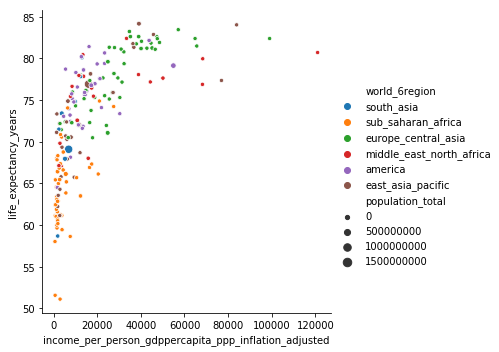

In [43]:
sns.relplot(x='income_per_person_gdppercapita_ppp_inflation_adjusted',y='life_expectancy_years',hue='world_6region',size='population_total',data=now)


In [46]:
now[now.income_per_person_gdppercapita_ppp_inflation_adjusted>80000].sort_values(by='income_per_person_gdppercapita_ppp_inflation_adjusted')

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,world_6region,name
31895,2018,83888,84.03,5791901,east_asia_pacific,Singapore
22212,2018,99034,82.39,590321,europe_central_asia,Luxembourg
30362,2018,121033,80.71,2694849,middle_east_north_africa,Qatar


Text(121033, 80.71, 'Qatar')

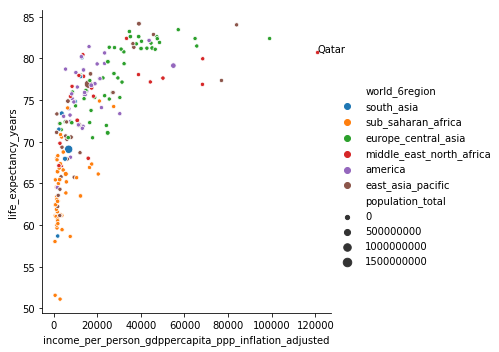

In [48]:
sns.relplot(x='income_per_person_gdppercapita_ppp_inflation_adjusted',y='life_expectancy_years',hue='world_6region',size='population_total',data=now)
gatar = now[now.name=='Qatar']
gatar_income = gatar.income_per_person_gdppercapita_ppp_inflation_adjusted.values[0]
gatat_lifespan=gatar.life_expectancy_years.values[0]
plt.text(x=gatar_income,y=gatat_lifespan,s='Qatar')

## Plot multiple years

In [0]:
time = [1818,1918,2018]

centuries = df[df.time.isin(time)]

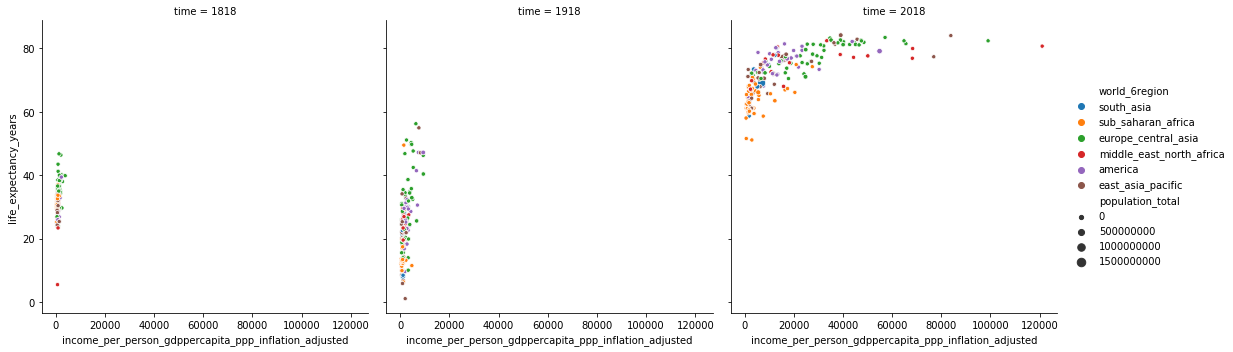

In [51]:
sns.relplot(x='income_per_person_gdppercapita_ppp_inflation_adjusted',y='life_expectancy_years',hue='world_6region',size='population_total',data=centuries,col='time')


## Point out a story

In [0]:
time=[1918,1938,1958,1978,1998,2018]


In [0]:
subset=df[df.time.isin(time)]


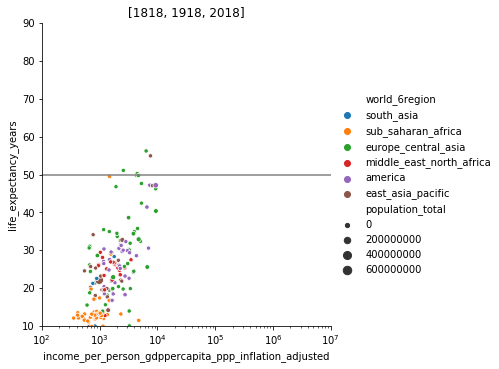

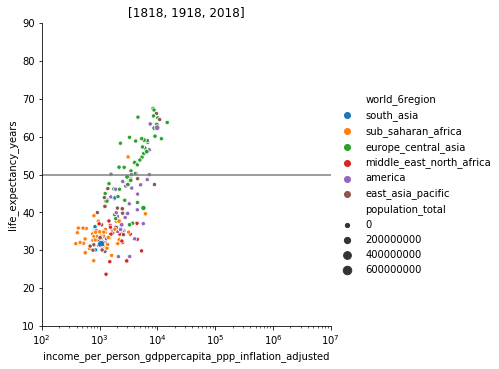

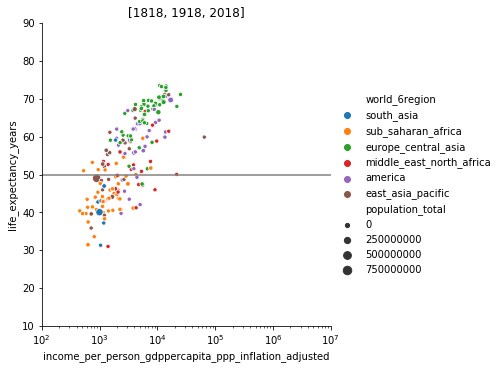

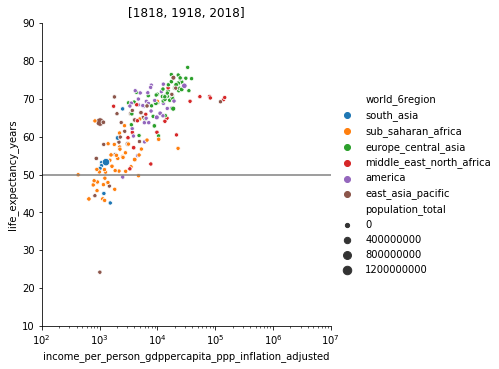

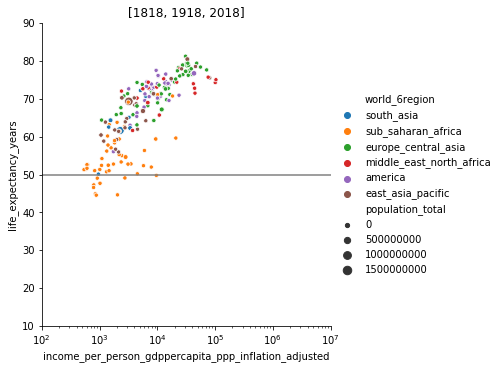

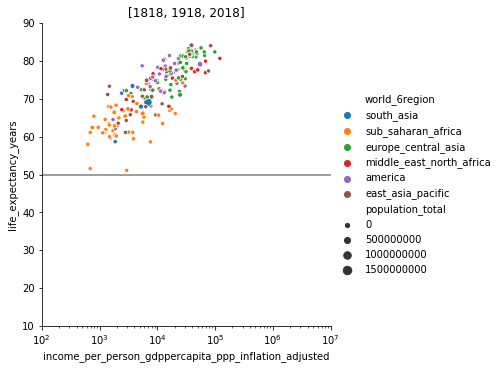

In [55]:
for time in time:
  sns.relplot(x='income_per_person_gdppercapita_ppp_inflation_adjusted',y='life_expectancy_years',hue='world_6region',size='population_total',data=df[df.time==time])

  plt.xscale('log')
  plt.title(year)
  plt.xlim(100,10000000)
  plt.ylim(10,90)
  plt.axhline(y=50,color='grey')

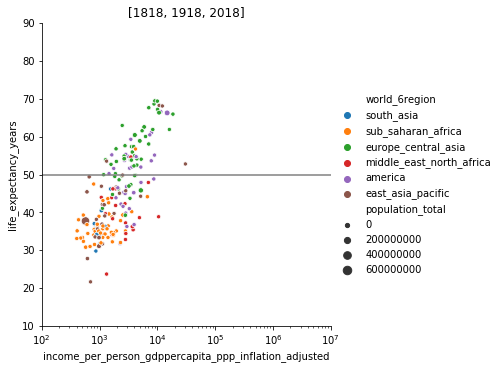

In [58]:
time=1946 
sns.relplot(x='income_per_person_gdppercapita_ppp_inflation_adjusted',y='life_expectancy_years',hue='world_6region',size='population_total',data=df[df.time==time])
plt.xscale('log')
plt.title(year)
plt.xlim(100,10000000)
plt.ylim(10,90)
plt.axhline(y=50,color='grey')

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project